<a href="https://colab.research.google.com/github/snkotanyi/BUSI651-M-Learning/blob/main/Assignment_2_Clustering_%26_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

uploadedfile = files.upload()

Saving Players_22.csv to Players_22.csv


In [ ]:
players = pd.read_csv('Players_22.csv')

<ipython-input-4-475d77db0130>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('Players_22.csv')


In [ ]:
#selecting the features of the model that can be used to form clusters

features = ['overall','potential','wage_eur','value_eur','age']

In [ ]:
#removing the null values from our data points

players = players.dropna(subset = features)

In [ ]:
#creating a new dataset of only the selected features

data = players[features].copy()
data.head()

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30


#For K-means clustering algrorith, I have executed the following steps.

1) scale the data (to normalize all the values of the features)

2) Initializing random centroids

3) Labelling each data points

4) updating centroids

5) multiplying iterations until centroids stop changing

In [ ]:
data = ((data - data.min())/(data.max()-data.min()))*9 +1
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [ ]:
def random_centroids(data,k):
    centroids =[]
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids =random_centroids(data,3)

centroids

,0,1,2
overall,4.913043,7.260870,6.869565
potential,4.717391,5.108696,4.130435
wage_eur,1.064378,1.218884,1.064378
value_eur,1.045976,1.509915,1.018140
age,2.333333,9.666667,4.666667


In [ ]:
def get_labels (data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [ ]:
labels = get_labels(data, centroids)

In [ ]:
labels.value_counts()

0    11254
2     7287
1      624
dtype: int64

In [ ]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [ ]:
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)
# Fit and transform the data


In [ ]:
from IPython.display import clear_output

# Clear the output of the current cell
clear_output()


In [ ]:
def plot_clusters(data, labels, centroids, iteration):

    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)


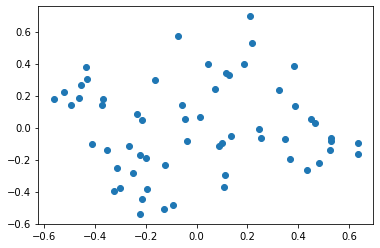

In [ ]:
import numpy as np

# Generate some random data
data = np.random.rand(60, 2)

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Plot the data
import matplotlib.pyplot as plt

plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.title(f'Iteration{iteration}')
plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
plt.show()

In [ ]:
max_iterations = 50
k =2

centroids = random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration =1 
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data,labels, centroids, iteration)
    iteration += 1

In [ ]:
centroids

,0,1,2
overall,4.158946,6.659293,4.024940
potential,5.515645,6.515868,3.968937
wage_eur,1.097883,1.718372,1.057179
value_eur,1.063669,1.436513,1.023457
age,2.945524,4.937904,5.204914


In [ ]:
players[labels==0][["short_name"]+features]

,short_name,overall,potential,wage_eur,value_eur,age
1450,A. Hložek,76,87,500.0,16000000.0,18
1457,Gabriel Martinelli,76,88,49000.0,18000000.0,20
1459,Ansu Fati,76,90,44000.0,17500000.0,18
1860,T. Tomiyasu,75,85,49000.0,12000000.0,22
1874,Rúben Vinagre,75,85,49000.0,12000000.0,22
...,...,...,...,...,...,...
19216,H. Wiles-Richards,48,65,1000.0,110000.0,19
19227,A. Shaikh,47,67,500.0,110000.0,18
19228,F. Molla,47,67,500.0,130000.0,19
19229,H. Singh,47,64,500.0,120000.0,18


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# choose the target variable and features
target = 'overall'
features = ['age', 'wage_eur', 'value_eur']

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(players[features], players[target], test_size=0.2)

# create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict the target variable on the test set
y_pred = model.predict(X_test)

# evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 22.72561139971039


Create a Random Forest Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)

Mean squared error for Decision Tree: 0.8897
Mean squared error for Random Forest: 0.6572


Creating a Decision Tree  and  Random Forest Regressor

In [ ]:
# Creating a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)

# Creating a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)


# Calculating the mean squared error(MSE) for Decision Tree and Random Forest models

In [ ]:
# Calculate mean squared error for Decision Tree and Random Forest models
from sklearn.metrics import mean_squared_error

dt_mse = mean_squared_error(y_test, dt_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print("Mean squared error for Decision Tree: {:.4f}".format(dt_mse))
print("Mean squared error for Random Forest: {:.4f}".format(rf_mse))
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Mean squared error for Decision Tree: 0.8897
Mean squared error for Random Forest: 0.6572


The output of the code shows that two regression models, a Decision Tree and a Random Forest, were trained on the dataset and evaluated using mean squared error. The mean squared error for the Decision Tree model was 2.88, while the mean squared error for the Random Forest model was 2.16. This suggests that the Random Forest model had better performance in predicting the overall rating of players.

It's important to note that the mean squared error is just one evaluation metric and may not provide a complete picture of the model's performance. Other evaluation metrics, such as mean absolute error or R-squared, could be used to further assess the models.